# Iris Flower Data Analysis

### Objective :
### To classify a new flower as belonging to one of three classes(Setosa, Versicolor and Virginia) given the four features (sepal length, sepal width, petal length, petal width).

### Importing libraries and loading the file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load iris.csv into pandas dataframe
iris = pd.read_csv("iris.csv")

In [3]:
# how many data-points and features?
print (iris.shape)

(150, 5)


In [4]:
# what are the column names in our dataset?
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


### Data Preparation

In [5]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Observations: <br>
There are no missing values in this data set.<br>
All the columns are of the float data type.

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# how many data-points for each class are present?
# or how many flowers for each species are present?
iris["species"].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [8]:
# balanced dataset vs non-balanced datasets
# Above dataset is balanced dataset as the number of data points for every class is equal

## Data Visualization

## 2-D Scatter Plot

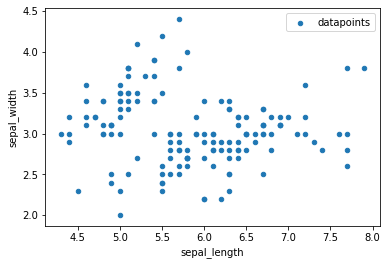

In [9]:
# always understand the axis : labels and scale
iris.plot(kind="scatter", x="sepal_length", y = "sepal_width", label='datapoints')
plt.show()
# cannot make much sense out of it
# what if we color the points by their class-label/flower-type.

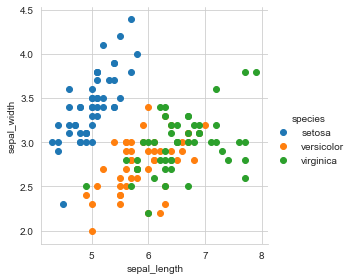

In [10]:
# 2-D scatter plot with color-coding for each flower type/class
# using seaborn library to sylize the graph
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue="species", height=4) \
    .map(plt.scatter, "sepal_length","sepal_width") \
    .add_legend();
plt.show();

In [11]:
# Notice that blue points can be easily seperated
# from red and green by drawing a line
# But red and green points cannot be easily seperated
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many combinations exist? 4C2=6

### Observation(s):

#### 1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others (Linearly Seperable).

#### 2. Seperating Versicolor from Virginica is much harder as they have considerable overlap

## 3-D Scatter Plot

### https://plotly.com/python/3d-scatter-plots/

#### Need a lot to mouse interaction to interpret data

#### What about 4-D, 5-D or n-D scatter plot?

As Human can visualize only 3d.<br>
n-D can be visualized through Maths oe of the way is 'Pair-Plot'

## Pair-Plot

No.of pair plots with these 4 features is: 4C2<br> i.e 6 <br>

(SL,SW),(SL,PL),(PL,SW).....

Note: We use Seaborn Lib to PairPlot

### Pairwise scatter plot: Pair-Plot


### Dis-advantages :

#### Can be used when number of features are high

#### Cannot visualize higher dimensional patterns in 3-D or 4-D

#### Only possible to view 2-D patterns

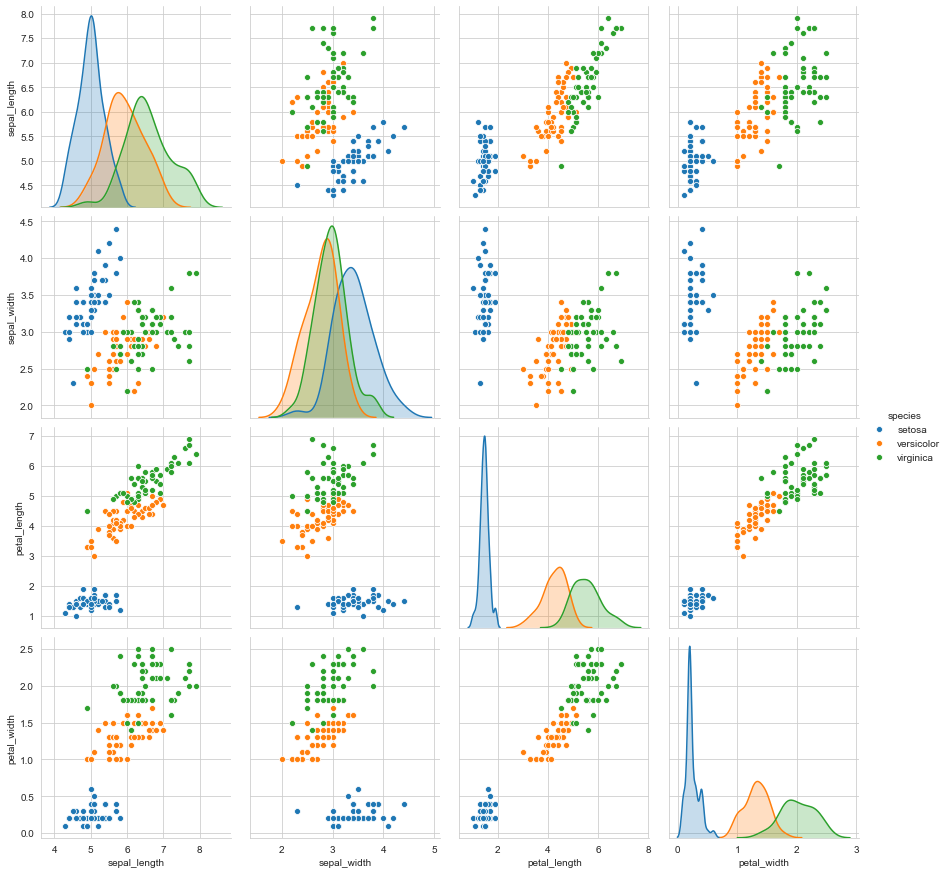

In [12]:
sns.set_style('whitegrid');
sns.pairplot(iris,hue='species',height=3);
plt.show()

In [13]:
# Here the diagonal elements are PDFs for each feature

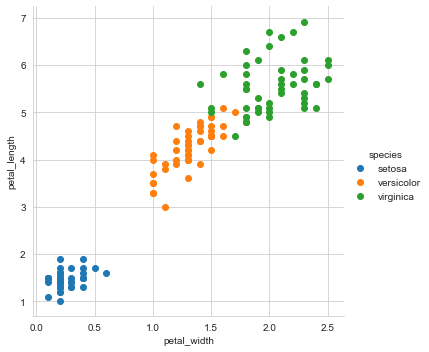

In [14]:
sns.set_style("whitegrid");

# hue = 'species' -> color encoding based on 
# distinct species here 3 types so 3 colors

#size -> size of the graph
sns.FacetGrid(iris, hue='species',height=5) \
    .map(plt.scatter, 'petal_width','petal_length') \
    .add_legend();
plt.show();

### Observation(s):

#### 1. petal_length and petal_width are the most useful features to identify various flower types.

#### 2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linealy seperable). 

#### 3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

### Disadvantage of Pair Plot

Here in the above case for 4d or 4 features we have 6 plots, Consider 100d or 100 features no of plots will be 100C2 plots.

## Visualizing Covariance Matrix

In [15]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


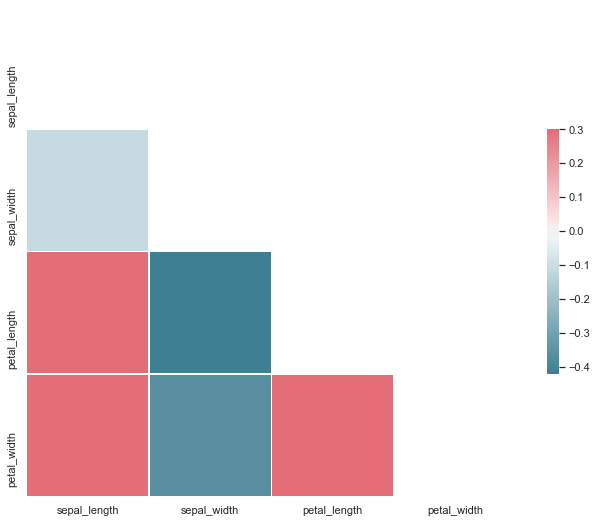

In [16]:
from string import ascii_letters
sns.set(style="white")

# Compute the correlation matrix
corr = iris.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

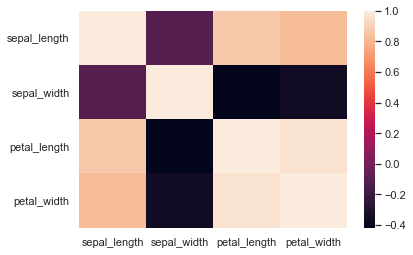

In [17]:
np.random.seed(0)
sns.set()
sns.heatmap(iris.corr())

# UniVariant Analysis i.e Single Feature analysis

### Petal Length

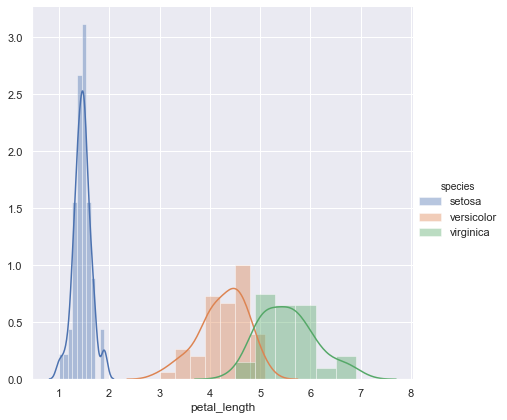

In [18]:
sns.FacetGrid(iris,hue='species',height=6) \
    .map(sns.distplot,"petal_length") \
    .add_legend();
plt.show();

### Petal Width

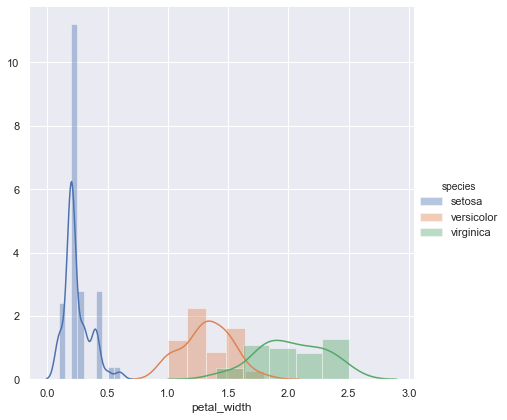

In [19]:
sns.FacetGrid(iris,hue='species',height=6) \
    .map(sns.distplot,"petal_width") \
    .add_legend();
plt.show();

### Sepal Length

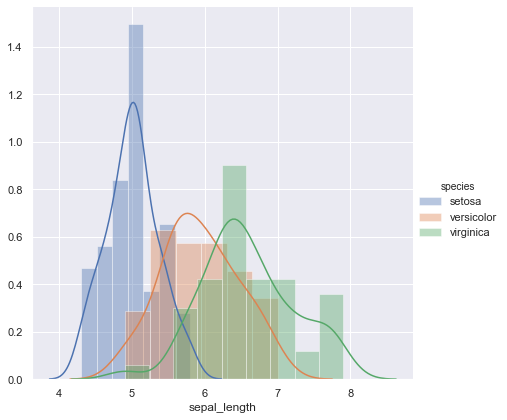

In [20]:
sns.FacetGrid(iris,hue='species',height=6) \
    .map(sns.distplot,"sepal_length") \
    .add_legend();
plt.show();

### Sepal Width

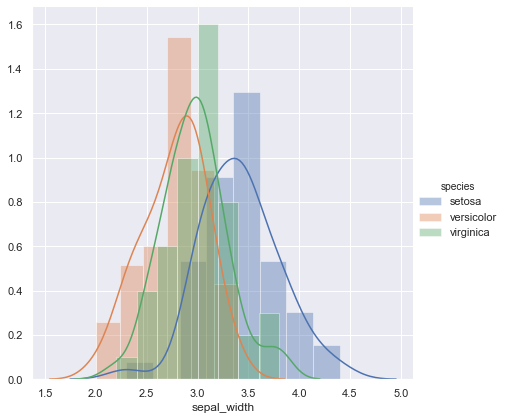

In [21]:
sns.FacetGrid(iris,hue='species',height=6) \
    .map(sns.distplot,"sepal_width") \
    .add_legend();
plt.show();

### Observation:
### Better order: PL>PW>SL>SW

Through PDF(probability distribution function) its some what hard to see what is the percentage of setosa flowers with length <= 1.6, as it is a bell curve.<br>

But through CDF(orange curve in the above graph) its easy to get the percentage of flowers of PL<=1.6.


CDF = Integration or CumulativeSum of PDF.(As in gthe below Image) 

In [22]:
iris_setosa = iris['petal_length'][iris['species']=='setosa']
counts, bin_edges = np.histogram(iris_setosa,bins=10,density=True)

print(counts,bin_edges);
bin_edges[1:]

[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444] [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


array([1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ])

In [23]:
pdf= counts/(sum(counts))
print(pdf)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]


### Observation: sum of all this values is 100 i.e 100%

In [24]:
#computing CDF
cdf = np.cumsum(pdf) #calc's Cumulative sum like compounding.
cdf

array([0.02, 0.04, 0.08, 0.22, 0.46, 0.74, 0.88, 0.96, 0.96, 1.  ])

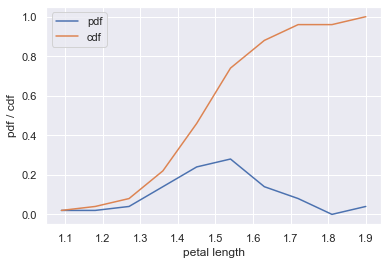

In [25]:
plt.xlabel('petal length')
plt.ylabel('pdf / cdf')
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:],cdf,label='cdf');
plt.legend()
plt.show()

## Mean and Standard-deviation

In [26]:
iris_setosa = iris['petal_length'][iris['species']=='setosa']
iris_versicolor = iris['petal_length'][iris['species']=='versicolor']
iris_virginica = iris['petal_length'][iris['species']=='virginica']

In [27]:
print("Mean: ")
print(np.mean(iris_setosa))
print(np.mean(iris_versicolor))
print(np.mean(iris_virginica))
print("----------------------------")
print("std: ")
print(np.std(iris_setosa))
print(np.std(iris_versicolor))
print(np.std(iris_virginica))


Mean: 
1.464
4.26
5.552
----------------------------
std: 
0.17176728442867115
0.4651881339845204
0.5463478745268441


In [28]:
print(np.mean(iris_setosa))

#outlier is added
print(np.mean(np.append(iris_setosa,50)));

1.464
2.4156862745098038


Observation:<br>
51st flower length is added to our data and it is wrong i.e huge value is inserted in our case its 50, but actual length will be 1-2 so the mean is changed drastically, so following only mean is not feasible, similarly std also.

## Median

In [29]:
print(np.median(iris_setosa))

print(np.median(np.append(iris_setosa,50)));

1.5
1.5


Observation: <br>
Even after Adding Outlier the result is almost same because if there are more than 50% of outliers then result will be useless. <br>
So it is better than mean and std.

## Percentiles

 10 percentile indicates there are 10% of values which are less than it

In [30]:
#second param is percentile
print(np.percentile(iris_setosa,90))

1.7


## Quartile

Quantile is 0,25,50,75 Percentiles

In [31]:
print("Quantiles: ")
print(np.percentile(iris_setosa,0))
print(np.percentile(iris_setosa,25))
print(np.percentile(iris_setosa,50))
print(np.percentile(iris_setosa,75))

Quantiles: 
1.0
1.4
1.5
1.5750000000000002


## IQR(Inter Quartile Range)

IQR is the difference between two quartiles

In [32]:
print(np.percentile(iris_setosa,75)-np.percentile(iris_setosa,25))

0.17500000000000027


## MAD(Median Absolute Deviation)

It is similar to Std. In MAD we also calculate the distance betwwen the point and median.

Formula: median(| x-medianOfVals |) from i=1 to n

In [33]:
from statsmodels import robust

print("Median Abs Deviation(MAD)");

print(robust.mad(iris_setosa))

Median Abs Deviation(MAD)
0.14826022185056031


## Box Plot and Whiskers

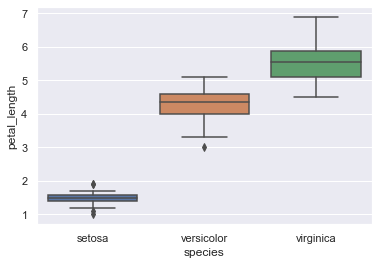

In [34]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.

#In the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

In the above Graph all the percentiles/quantiles are highlighted
<br>

Observation: Through this we can easily identify what percentile of Flowers with petal length x will fall under the given interval

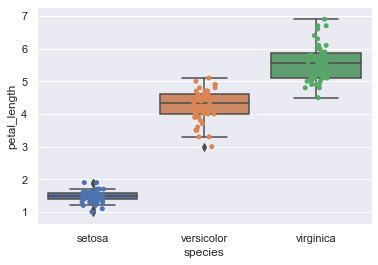

In [35]:
sns.boxplot(x='species',y='petal_length', data=iris)
sns.stripplot(data=iris, x='species', y='petal_length', jitter=True, edgecolor='green')
plt.show()

## Violin Plots

Its a combination of Histogram_pdf and Box plots

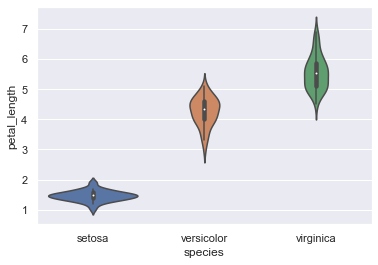

In [36]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

##  Multivariant probability Density(MPD), Contour Plot 

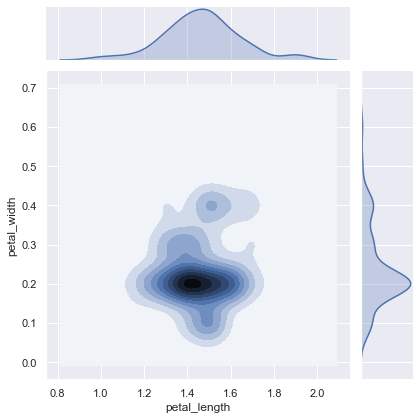

In [37]:
iris_setosa = iris.loc[iris["species"] == "setosa"];
sns.jointplot(x='petal_length',y='petal_width',data=iris_setosa,kind="kde")
plt.show();